# Sprint 5

# Tasta M5 T01

## Ejercicio 1

### Parte el conjunto de datos en train_test.

Para empezar, importamos todas las librerias necesarias y descargamos la base de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housing data.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


De inmediato nos damos cuenta que el dataset no cuenta con los nombres de las columnas, por lo que las agregamos.

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Los nombres de las columnas significan lo siguiente:

* **CRIM**: Tasa de criminalidad per cápita por ciudad.
* **ZN**: Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
* **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
* **CHAS**: Terreno que limita con un río.
* **NOX**: Concentración de óxidos de nitrógeno (partes por cada 10 millones).
* **RM**: Número promedio de habitaciones por vivienda.
* **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* **DIS**: Distancias ponderadas a cinco centros de empleo de Houston.
* **RAD**: Índice de accesibilidad a carreteras radiales.
* **TAX**: Tasa de impuesto sobre la propiedad de valor total por cada 10,000 dólares.
* **PTRATIO**: Relación alumnos-maestros.
* **B**: Proporción de personas afroamericanas.
* **LSTAT**: Porcentaje de población de estatus socioeconómico bajo.
* **MEDV**: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares.

#### A continuación exploramos el contenido del dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Podemos observar que el dataset contiene 12 columnas y 506 filas.  Los dtypes son todos númericos _float_ o  _interger_ y no hay valores vacíos, lo cual comprobamos a continuación para después hacer un resumen estadístico. 

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.00,408.24,168.54,187.00,279.00,330.00,666.00,711.00


Con el resumen estadístico, podemos darnos cuenta que la columna de **"CHAS"** solo tiene valores 0 y 1, por lo que asumimos que son valores categoricos y hacemos el cambio del datatype. 

Así mismo, la columna **"RAD"** al ser un índice se considera una variable categorica aunque con valores numéricos, por lo que se le hará ningún cambio por el momento.

In [7]:
df[['CHAS']] = df[['CHAS']].astype('category')

In [8]:
df[['RAD']].value_counts()

RAD
24     132
5      115
4      110
3       38
6       26
2       24
8       24
1       20
7       17
dtype: int64

Una vez cambiados los datos, visualizamos los valores numéricos con un boxplot para tener una mejor idea de las medias y también saber si existen outliers.

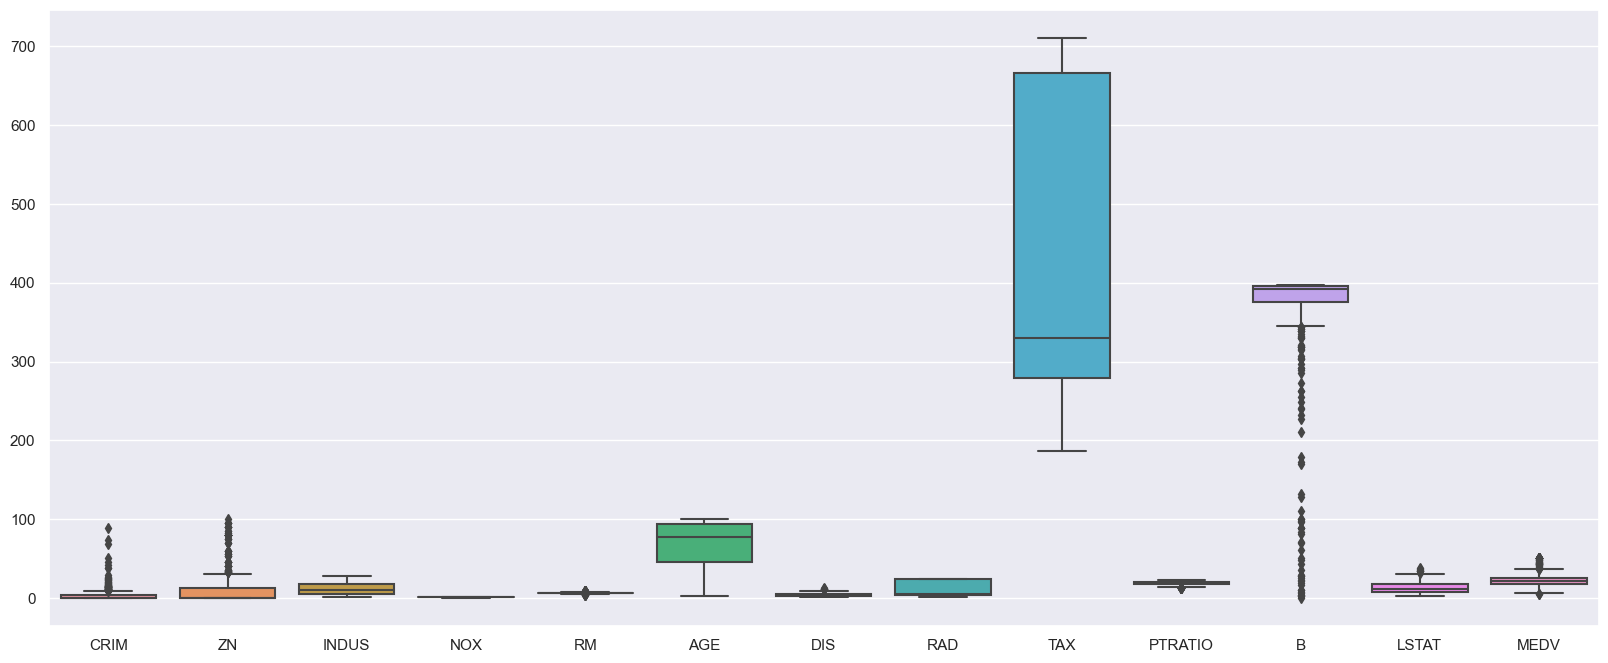

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df, orient='v')

La gráfica revela la presencia de valores atípicos en las variables **CRIM, ZN, RM, DIS, B, LSTAT** y **MEDV**. Destaca especialmente la variable **B** -Proporción de personas afroamericanas- la cual exhibe una marcada tendencia a la baja en comparación con las demás variables.

Además, se observan diferencias en las medias entre las distintas variables. Por ejemplo, en **AGE** la media se encuentra más cerca  del tercer cuartil (75%), lo que indica una tendencia hacia valores más bajos, al igual que **B**. Por el contrario, en **TAX**, la media se localiza por encima del primer cuartil (25%), sugiriendo una tendencia hacia valores más altos.

En cuanto a los valores máximos, se destaca la variable **TAX**, la cual muestra los valores máximos más altos. Esto indica que existen áreas con impuestos más elevados. A continuación, se encuentran las variables **B, AGE** y **ZN**, respectivamente.

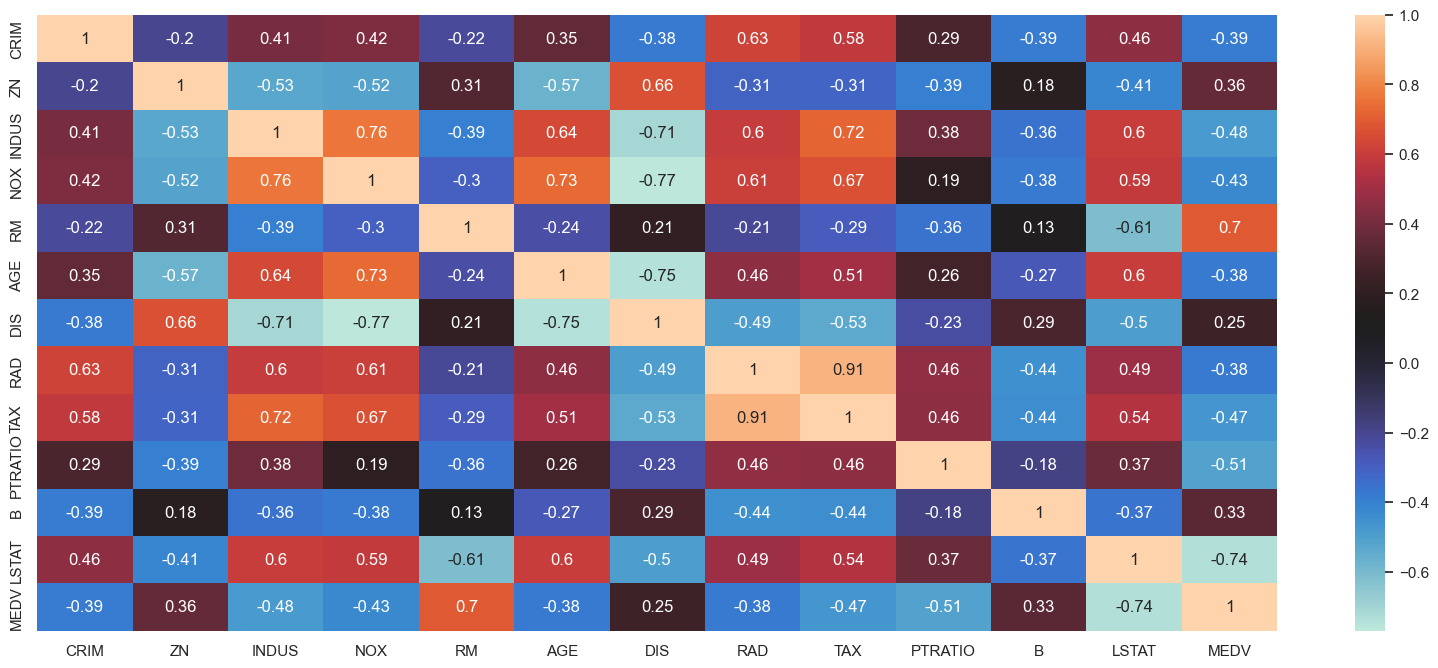

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='icefire')

El mapa de calor nos permite visualizar las relaciones entre las variables. Por ejemplo, podemos notar una asociación positiva entre la variable **INDUS** y las variables **TAX (0.72) y NOX (0.76)**. Esto sugiere que las áreas con una mayor proporción de negocios no minoristas tienden a tener una mayor concentración de óxidos de nitrógeno y a pagar más impuestos. También resulta interesante la correlación entre la concentración de óxidos de nitrógeno **NOX** y las viviendas construidas antes de 1940 **AGE (0.73)**, lo cual podría indicar la presencia de sistemas de ventilación y calefacción más antiguos y, por ende, más contaminantes.

En cuanto a correlaciones negativas fuertes, encontramos una relación de -0.74 entre las variables **LSTAT y MEDV**. Esto significa que a medida que disminuye el porcentaje de población de nivel socioeconómico bajo, tiende a aumentar el valor mediano de las viviendas ocupadas. En otras palabras, hay menos personas de nivel socioeconómico bajo viviendo en zonas donde las viviendas son más caras.

Además, observamos una correlación positiva de 0.70 entre **MEDV** y el número promedio de habitaciones **RM**. Esto indica que a medida que aumenta el número de habitaciones, también se incrementa el valor mediano de las viviendas ocupadas. En resumen, las viviendas más grandes tienden a tener un valor más alto.

### Estudia los dos conjuntos por separado a nivel descriptivo.

Después de analizar el conjunto de datos, se puede concluir que todas las columnas, a excepción de la columna que representa el valor mediano de las viviendas **MEDV**, son características independientes. Por lo tanto, hemos seleccionado la columna **MEDV** como nuestra variable objetivo o columna target.

Descargamos la librería sklearn.model_selection para aplicar el `train_test_split`.  Adicionalmente, creamos el dataset **X** quitando la columna target y dejando las variables independientes y la **y** con los valores de la columna **MEDV** que será el target.

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Confirmamos que ambos dataset, tanto de test `X_train`,`y_train` como de train `X_test`,`y_test` sean del mismo tamaño.

In [12]:
print(len(X_test) == len(y_test))
print(len(X_train) == len(y_train))

True
True


Una vez comprobado que ambos datasets son iguales, procedemos a analizarlos.  Primero X_train y después X_test.

In [13]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,3.91,9.10,0.01,0.08,0.28,4.25,88.98
ZN,404.00,11.25,23.75,0.00,0.00,0.00,12.50,100.00
INDUS,404.00,11.55,6.96,0.46,5.32,9.90,18.10,27.74
NOX,404.00,0.56,0.12,0.39,0.45,0.54,0.63,0.87
RM,404.00,6.24,0.67,3.56,5.87,6.16,6.57,8.78
AGE,404.00,69.22,27.96,2.90,45.68,77.50,94.60,100.00
DIS,404.00,3.76,2.13,1.14,2.04,3.13,5.04,12.13
RAD,404.00,9.94,8.93,1.00,4.00,5.00,24.00,24.00
TAX,404.00,417.23,172.22,187.00,280.75,345.00,666.00,711.00
PTRATIO,404.00,18.55,2.14,12.60,17.40,19.10,20.20,22.00


In [14]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.00,2.44,6.17,0.01,0.07,0.17,1.12,45.75
ZN,102.00,11.83,21.65,0.00,0.00,0.00,20.00,85.00
INDUS,102.00,9.52,6.21,1.25,4.33,7.38,18.10,21.89
NOX,102.00,0.54,0.11,0.40,0.45,0.51,0.60,0.87
RM,102.00,6.46,0.79,4.37,6.04,6.39,6.82,8.72
AGE,102.00,66.03,28.90,6.50,40.17,76.00,91.07,100.00
DIS,102.00,3.93,2.00,1.13,2.29,3.27,5.47,8.91
RAD,102.00,8.02,7.62,1.00,4.00,5.00,8.00,24.00
TAX,102.00,372.61,148.59,193.00,276.25,307.00,403.00,666.00
PTRATIO,102.00,18.08,2.22,12.60,16.60,17.95,20.20,21.20


Para poder compararlos mejor, usamos dos boxplot y así visualizarlos mejor.

Text(0.5, 1.0, 'Test')

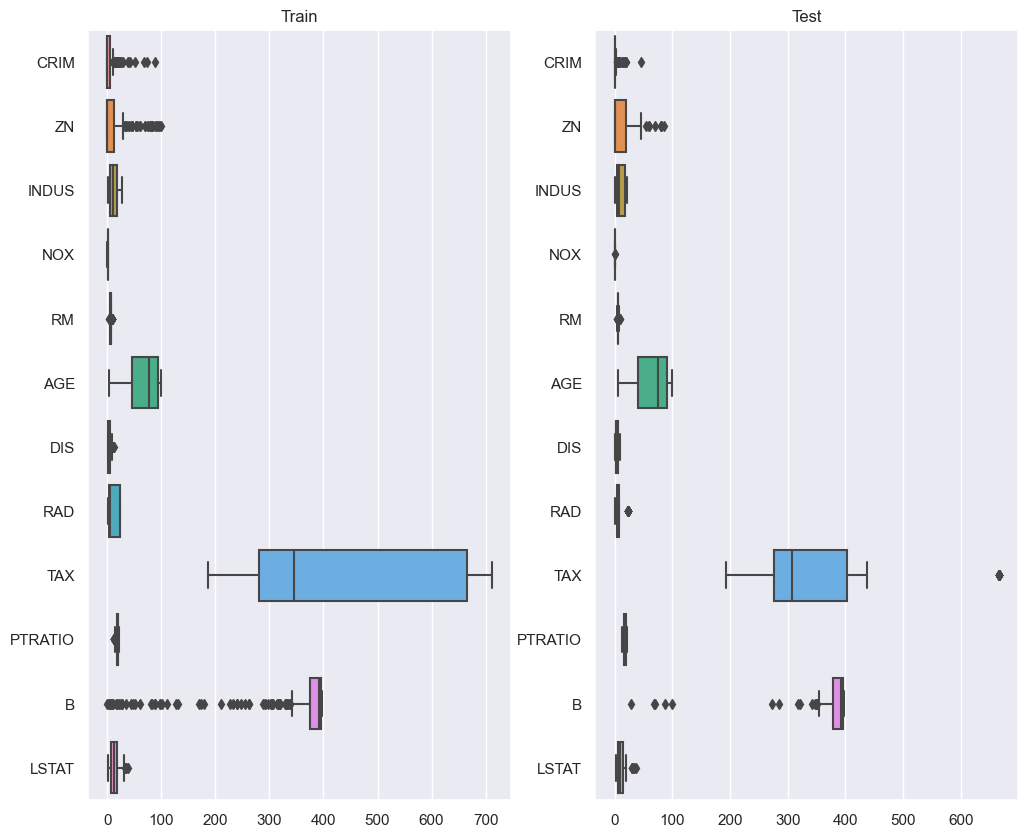

In [15]:
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(X_train, orient='h', ax=ax1)
plt.title('Train')

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(X_test, orient='h', ax=ax2)
plt.title('Test')

Al comparar las gráficas, se evidencia una diferencia significativa en las medias de algunas variables. Específicamente, las mayores diferencias se observan en las variables **TAX y B**, las cuales presentan valores más altos en el conjunto de datos de referencia.

En cuanto a los outliers, se puede apreciar que la variable **B** tiene una mayor cantidad de ellos en el diagrama de train.

In [16]:
mean_xtrain = X_train[['TAX', 'B']].mean()
mean_xtest = X_test[['TAX', 'B']].mean()
comparacion = pd.concat([mean_xtrain, mean_xtest], axis=1, keys=['X_train', 'X_test'])
comparacion['Diferencia'] = comparacion['X_train']-comparacion['X_test']
comparacion

,X_train,X_test,Diferencia
TAX,417.23,372.61,44.62
B,353.55,369.03,-15.48


La tabla muestra las diferencias entre las medias de las variables para los conjuntos de datos `X_train` y `X_test`. 

Al examinar la tabla, podemos confirmar que la variable **TAX** presenta la mayor diferencia de más de 44 puntos, lo cual es consistente con la descripción previa. Además, la columna **B** muestra una diferencia de 15.48 puntos negativos. 

Por lo tanto, podemos deducir que existe una diferencia significativa entre las variables **TAX y B** del conjunto `X_train` y el `X_test`

In [17]:
stat, p = shapiro(X_train['B'])
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Los datos de B_train siguen una distribución normal. Por lo tanto, no se rechaza la Hipótesis Nula (H0).')
else: 
    print('Los datos de B_train  no siguen una distribución normal. Por lo tanto, se rechaza la Hipótesis Nula (H0).')

    
stat, p = shapiro(X_test['B'])
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Los datos de B_test siguen una distribución normal. Por lo tanto, no se rechaza la Hipótesis Nula (H0).')
else: 
    print('Los datos de B_test no siguen una distribución normal. Por lo tanto, se rechaza la Hipótesis Nula (H0).')

stat=0.493, p=0.000
Los datos de B_train  no siguen una distribución normal. Por lo tanto, se rechaza la Hipótesis Nula (H0).
stat=0.408, p=0.000
Los datos de B_test no siguen una distribución normal. Por lo tanto, se rechaza la Hipótesis Nula (H0).


Finalmente, comprobamos con un test de Shapiro que no hay distribución normal con la variante **B** por lo que rechazamos la Hipotesis nula (H0) de que los datos siguen una distribución normal.

## Ejercicio 2

### Aplica algún proceso de transformación (estandarización de los datos numéricos, creación de columnas dummies, polinomios, etc.).

La columna **CHAS** no requiere más preprocesamiento, ya que es una variable binaria. Sin embargo, creamos variables para su uso posterior.

En relación a la variable **RAD**, hemos verificado que contiene valores del 1 al 8, pero también incluye un valor atípico de 24. Aunque es una variable categórica en esencia, se representa como una columna numérica, por lo que no es necesario realizar cambios adicionales. Sin embargo, hemos decidido aplicar OneHotEncoder en este caso, con el propósito de practicar su uso en este momento.

In [18]:
binaria_train = X_train['CHAS']
binaria_test = X_test['CHAS']

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_rad = ohe.fit_transform(X_train[['RAD']]).toarray()

ohe.categories_
ohe_rad_labels = ['RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24' ]

ohe_train = pd.DataFrame(ohe_rad, columns=ohe_rad_labels)
ohe_train

,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
399,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
400,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
401,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
402,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Una vez que hemos generado las columnas dummy en X_train, procedemos a aplicar el mismo proceso al dataframe X_test.

In [20]:
ohe_rad_test = ohe.transform(X_test[['RAD']]).toarray()
ohe_test = pd.DataFrame(ohe_rad_test, columns=ohe_rad_labels)
ohe_test

,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
97,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
98,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
99,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
100,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


Para realizar la estandarización de los datos numéricos, separamos las variables de X_train y X_test en dos conjuntos: las variables con valores atípicos y las variables sin valores atípicos. Esto nos permitirá aplicar los escaladores _MinMaxScaler y RobustScaler_ respectivamente.

Primero aplicamos el preprocesamiento a las variables sin valores atípicos o outliers importando **MinMaxScaler**.

In [21]:
from sklearn.preprocessing import MinMaxScaler

columns_sin_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

scaling = MinMaxScaler()
X_train_MinMax = scaling.fit_transform(X_train[columns_sin_outliers])
X_test_MinMax = scaling.transform(X_test[columns_sin_outliers])

train_MinMax = pd.DataFrame(X_train_MinMax, columns=columns_sin_outliers)
test_MinMax = pd.DataFrame(X_test_MinMax, columns=columns_sin_outliers)

In [22]:
train_MinMax.head(3)

,INDUS,NOX,AGE,TAX
0,0.19,0.11,0.44,0.11
1,0.65,0.51,1.00,0.91
2,0.28,0.31,0.97,0.23


In [23]:
test_MinMax.head(3)

,INDUS,NOX,AGE,TAX
0,0.06,0.18,0.57,0.07
1,0.09,0.03,0.07,0.15
2,0.11,0.03,0.15,0.29


Después lo hacemos con las variables con valores atípicos y **RobustScaler**

In [24]:
from sklearn.preprocessing import RobustScaler

columns_con_outliers = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

scaling = RobustScaler()
X_train_Robust = scaling.fit_transform(X_train[columns_con_outliers])
X_test_Robust = scaling.transform(X_test[columns_con_outliers])

train_Robust = pd.DataFrame(X_train_Robust, columns=columns_con_outliers)
test_Robust = pd.DataFrame(X_test_Robust, columns=columns_con_outliers)

In [25]:
train_Robust.head(3)

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.05,1.68,-0.29,1.23,-0.82,0.19,0.16
1,3.17,0.00,-3.31,-0.54,0.39,-11.87,0.15
2,0.32,0.00,-0.10,0.21,0.68,-6.53,0.87


In [26]:
train_Robust.head(3)

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.05,1.68,-0.29,1.23,-0.82,0.19,0.16
1,3.17,0.00,-3.31,-0.54,0.39,-11.87,0.15
2,0.32,0.00,-0.10,0.21,0.68,-6.53,0.87


Una vez que se tienen los cambios, concatenamos los dataframes para tener los cambios hechos en X_train y X_test.

In [27]:
X_train = pd.concat([train_MinMax.reset_index(drop=True), binaria_train.reset_index(drop=True), ohe_train.reset_index(drop=True),
                     train_Robust.reset_index(drop=True)], axis=1)
X_test = pd.concat([test_MinMax.reset_index(drop=True), binaria_test.reset_index(drop=True), ohe_test.reset_index(drop=True),
                    test_Robust.reset_index(drop=True)], axis=1)
pd.set_option('display.max_columns', None)

In [28]:
X_train

,INDUS,NOX,AGE,TAX,CHAS,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,0.19,0.11,0.44,0.11,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.05,1.68,-0.29,1.23,-0.82,0.19,0.16
1,0.65,0.51,1.00,0.91,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.17,0.00,-3.31,-0.54,0.39,-11.87,0.15
2,0.28,0.31,0.97,0.23,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,-0.10,0.21,0.68,-6.53,0.87
3,0.45,0.11,0.52,0.40,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.05,0.00,0.10,0.63,-0.14,-0.22,0.05
4,0.13,0.26,0.88,0.21,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.03,0.00,-0.85,-0.18,-0.89,0.26,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.25,0.22,0.51,0.19,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.03,0.00,0.38,0.47,0.18,0.26,-0.48
400,0.28,0.31,0.55,0.23,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,-0.47,0.46,0.68,0.20,-0.35
401,0.65,0.41,0.40,0.91,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.50,0.00,-0.42,0.20,0.39,-0.94,0.15
402,0.92,0.40,0.88,0.00,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,0.00,-0.26,-0.38,0.00,-0.29,0.30


In [29]:
X_test

,INDUS,NOX,AGE,TAX,CHAS,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,0.06,0.18,0.57,0.07,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.06,2.64,0.65,0.08,-0.25,0.09,-0.30
1,0.09,0.03,0.07,0.15,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.06,4.80,0.92,1.03,-1.25,0.09,-0.70
2,0.11,0.03,0.15,0.29,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.06,6.40,0.18,1.16,-1.07,0.26,-0.74
3,0.03,0.09,0.33,0.28,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.06,3.20,1.12,1.89,0.21,-0.07,-0.61
4,0.70,1.00,1.00,0.41,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.29,0.00,-1.09,-0.52,-1.57,-2.27,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.37,0.21,0.58,0.17,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.04,0.00,-0.14,0.37,-0.18,-0.46,0.29
98,0.13,0.26,0.68,0.21,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.05,0.00,-0.44,-0.14,-0.89,0.09,-0.23
99,0.30,0.28,0.97,0.38,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.04,0.00,0.45,-0.23,0.64,0.18,0.04
100,0.16,0.09,0.51,0.22,0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-0.04,2.40,0.28,1.30,-0.89,-0.85,-0.06


Generamos gráficas de densidad para ambos conjuntos de datos con el fin de visualizar las modificaciones realizadas.

<Figure size 5000x2000 with 0 Axes>

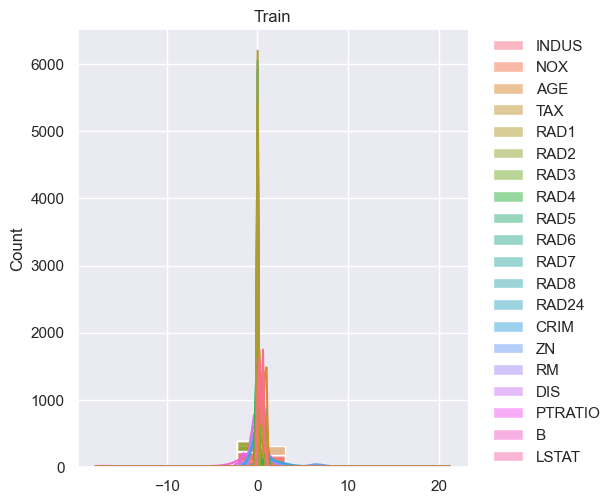

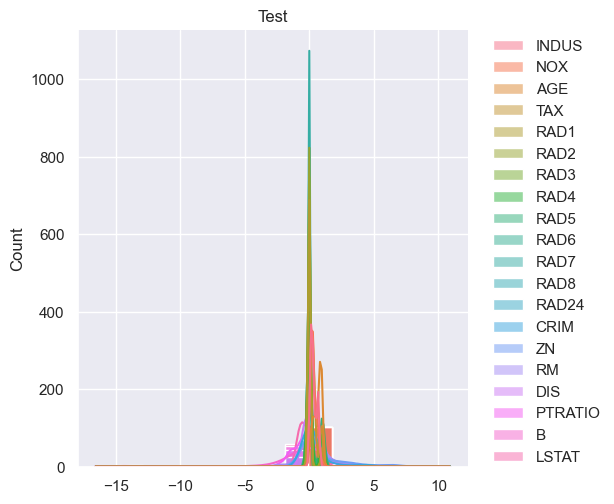

In [30]:
fig = plt.figure(figsize=(50,20))

sns.displot(X_train, kde=True, bins=15, ax=ax1)
plt.title('Train')

sns.displot(X_test, kde=True, bins=15, ax=ax2)
plt.title('Test')

plt.show()

Después de haber aplicado el proceso de transformación, lo primero que notamos es que los valores de ambos conjuntos se encuentran equilibrados y distribuidos de manera simétrica, sin mostrar un sesgo hacia valores positivos o negativos, lo que sugiere un equilibrio en las mediciones de los datos.

## Ejercicio 3

### Resume las nuevas columnas generadas de manera estadística y gráfica.

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   INDUS    404 non-null    float64 
 1   NOX      404 non-null    float64 
 2   AGE      404 non-null    float64 
 3   TAX      404 non-null    float64 
 4   CHAS     404 non-null    category
 5   RAD1     404 non-null    float64 
 6   RAD2     404 non-null    float64 
 7   RAD3     404 non-null    float64 
 8   RAD4     404 non-null    float64 
 9   RAD5     404 non-null    float64 
 10  RAD6     404 non-null    float64 
 11  RAD7     404 non-null    float64 
 12  RAD8     404 non-null    float64 
 13  RAD24    404 non-null    float64 
 14  CRIM     404 non-null    float64 
 15  ZN       404 non-null    float64 
 16  RM       404 non-null    float64 
 17  DIS      404 non-null    float64 
 18  PTRATIO  404 non-null    float64 
 19  B        404 non-null    float64 
 20  LSTAT    404 non-null    float64

Después de aplicar las modificaciones correspondientes, se puede apreciar que el conjunto X_train mantiene su cantidad de filas (404). Sin embargo, ahora cuenta con un total de 22 columnas, ya que la variable CHAS ha sido dividido en CHAS0 y CHAS1, debido a que sus valores originales eran exclusivamente 0 y 1.

Asimismo, se ha llevado a cabo una división de la variable RAD en 9 columnas, dado que los valores originales del índice abarcaban los números 1, 2, 3, 4, 5, 6, 7, 8 y 24. Por consiguiente, las nuevas columnas han adoptado dichos números como nombres, siguiendo la estructura "RAD" seguida del número correspondiente.

In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   INDUS    102 non-null    float64 
 1   NOX      102 non-null    float64 
 2   AGE      102 non-null    float64 
 3   TAX      102 non-null    float64 
 4   CHAS     102 non-null    category
 5   RAD1     102 non-null    float64 
 6   RAD2     102 non-null    float64 
 7   RAD3     102 non-null    float64 
 8   RAD4     102 non-null    float64 
 9   RAD5     102 non-null    float64 
 10  RAD6     102 non-null    float64 
 11  RAD7     102 non-null    float64 
 12  RAD8     102 non-null    float64 
 13  RAD24    102 non-null    float64 
 14  CRIM     102 non-null    float64 
 15  ZN       102 non-null    float64 
 16  RM       102 non-null    float64 
 17  DIS      102 non-null    float64 
 18  PTRATIO  102 non-null    float64 
 19  B        102 non-null    float64 
 20  LSTAT    102 non-null    float64

Los cambios realizados también se reflejan en el conjunto de X_test, con la diferencia de que conserva su cantidad de filas, que en este caso son 22. Es importante recordar que X_test representa el 20% de los valores del conjunto de datos original.

In [33]:
columns = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT','RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 
           'RAD6', 'RAD7', 'RAD8', 'RAD24','INDUS', 'NOX', 'AGE', 'TAX']

print('Comparación de Medianas')
mean_xtrain = X_train[columns].mean()
mean_xtest = X_train[columns].mean()
comparacion = pd.concat([mean_xtrain, mean_xtest], axis=1, keys=['X_train', 'X_test'])
comparacion['Diferencia'] = comparacion['X_train']-comparacion['X_test']
comparacion

Comparación de Medianas


,X_train,X_test,Diferencia
CRIM,0.87,0.87,0.00
ZN,0.90,0.90,0.00
RM,0.11,0.11,0.00
DIS,0.21,0.21,0.00
PTRATIO,-0.20,-0.20,0.00
B,-1.72,-1.72,0.00
LSTAT,0.12,0.12,0.00
RAD1,0.03,0.03,0.00
RAD2,0.05,0.05,0.00
RAD3,0.08,0.08,0.00


In [34]:
print('Comparación de Desviación Estandar')
std_xtrain = X_train[columns].std()
std_xtest = X_train[columns].std()
comparacion = pd.concat([std_xtrain, std_xtest], axis=1, keys=['X_train', 'X_test'])
comparacion['Diferencia'] = comparacion['X_train']-comparacion['X_test']
comparacion

Comparación de Desviación Estandar


,X_train,X_test,Diferencia
CRIM,2.18,2.18,0.00
ZN,1.90,1.90,0.00
RM,0.97,0.97,0.00
DIS,0.71,0.71,0.00
PTRATIO,0.77,0.77,0.00
B,4.36,4.36,0.00
LSTAT,0.72,0.72,0.00
RAD1,0.18,0.18,0.00
RAD2,0.21,0.21,0.00
RAD3,0.27,0.27,0.00


In [35]:
print('Comparación de Mínimos')
min_xtrain = X_train[columns].min()
min_xtest = X_train[columns].min()
comparacion = pd.concat([min_xtrain, min_xtest], axis=1, keys=['X_train', 'X_test'])
comparacion['Diferencia'] = comparacion['X_train']-comparacion['X_test']
comparacion

Comparación de Mínimos


,X_train,X_test,Diferencia
CRIM,-0.07,-0.07,0.00
ZN,0.00,0.00,0.00
RM,-3.75,-3.75,0.00
DIS,-0.67,-0.67,0.00
PTRATIO,-2.32,-2.32,0.00
B,-17.86,-17.86,0.00
LSTAT,-1.02,-1.02,0.00
RAD1,0.00,0.00,0.00
RAD2,0.00,0.00,0.00
RAD3,0.00,0.00,0.00


In [36]:
print('Comparación de Máximos')
max_xtrain = X_train[columns].max()
max_xtest = X_train[columns].max()
comparacion = pd.concat([max_xtrain, max_xtest], axis=1, keys=['X_train', 'X_test'])
comparacion['Diferencia'] = comparacion['X_train']-comparacion['X_test']
comparacion

Comparación de Máximos


,X_train,X_test,Diferencia
CRIM,21.27,21.27,0.00
ZN,8.00,8.00,0.00
RM,3.77,3.77,0.00
DIS,3.01,3.01,0.00
PTRATIO,1.04,1.04,0.00
B,0.26,0.26,0.00
LSTAT,2.68,2.68,0.00
RAD1,1.00,1.00,0.00
RAD2,1.00,1.00,0.00
RAD3,1.00,1.00,0.00


Las tablas nos muestras que ya no hay diferencia alguna en cuanto a **medias, desviación estandar, mínimos y máximos** entre los conjuntos X_train y X_test.

Text(0.5, 1.0, 'Train')

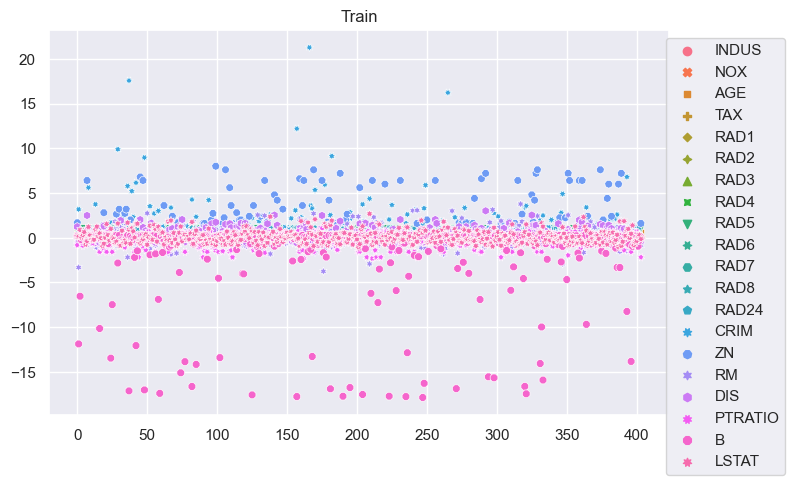

In [37]:
fig = plt.figure(figsize=(8,5))

sns.scatterplot(X_train)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title ('Train')

Text(0.5, 1.0, 'Test')

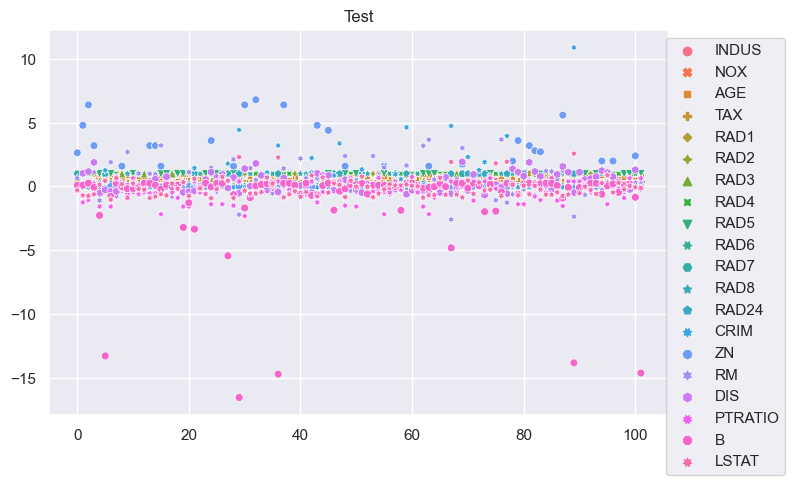

In [38]:
fig = plt.figure(figsize=(8,5))

sns.scatterplot(X_test)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title ('Test')

Las gráficas respaldan la información presentada en las tablas, mostrando que las estadísticas de media, desviación estándar, mínimo y máximo son idénticas tanto en X_train como en X_test.

No obstante, la diferencia más notable se encuentra en la presencia de outliers en las diferentes variables dentro de cada conjunto.